In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as sts
import math
import statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
%matplotlib inline

In [9]:
teta = 1
alpha = .05
n = 100

Построим доверительные интервалы в теоретических задачах 1, 3, 4, 5

Доверительный интервал для среднего


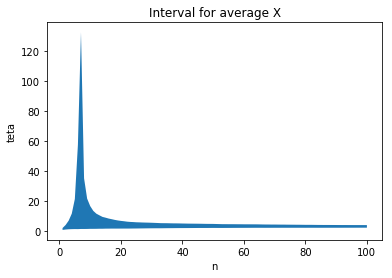

Доверительный интервал для первой порядковой статистики


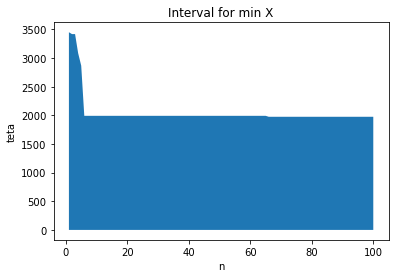

Доверительный интервал n-ой порядковой статистики


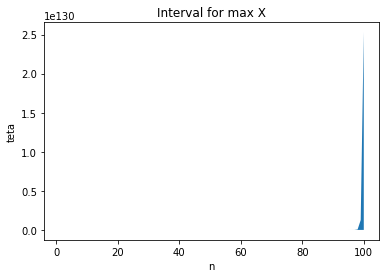

In [32]:
#task_1
teta = 1
rv = sts.uniform(teta)
X = rv.rvs(100)
fr = np.zeros((100))
to = np.zeros((100))
print u'Доверительный интервал для среднего'
for i in range(1, 101):
    avgX = np.cumsum(X)[i - 1] / i
    eps = math.sqrt(1. / (12 * i  * alpha))
    fr[i - 1] = abs(avgX * 1. / (.5 + eps))
    to[i - 1] = abs(avgX * 1. / (.5 - eps))
plt.fill_between(range(1, 101), fr, to)
plt.title("Interval for average X")
plt.xlabel('n')
plt.ylabel('teta')
plt.show()

print u'Доверительный интервал для первой порядковой статистики'
for i in range(1, 101):
    fr[i - 1] = 0
    to[i - 1] = min(X[0 : i]) * 1. / (1 - math.pow(1 - alpha, 1./n))
plt.fill_between(range(1, 101), fr, to)
plt.title("Interval for min X")
plt.xlabel('n')
plt.ylabel('teta')
plt.show()    

print u'Доверительный интервал n-ой порядковой статистики'
for i in range(1, 101):
    fr[i - 1] = max(X[0 : i]) * 1. / math.pow(alpha, i)
    to[i - 1] = min(X[0 : i])
plt.fill_between(range(1, 101), fr, to)
plt.title("Interval for max X")
plt.xlabel('n')
plt.ylabel('teta')
plt.show()

Доверительный интервал для параметра распределения Коши


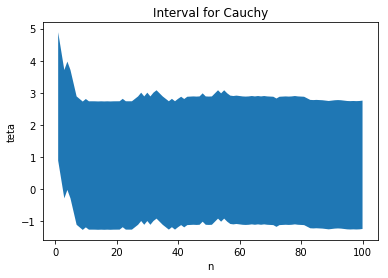

In [39]:
#task_3
rv = sts.cauchy(teta)
X = rv.rvs(100)
fr = np.zeros((100))
to = np.zeros((100))
Ufr = rv.ppf((1 + .95) / 2)
Uto = rv.ppf((1 - .95) / 2)
print u'Доверительный интервал для параметра распределения Коши'
for i in range(1, 101):
    sortedX = X[0 : i]
    sortedX.sort()
    if (i % 2) == 1:
        mu = sortedX[i / 2]
    else:
        mu = .5 * (sortedX[i / 2 - 1] + sortedX[i / 2])
    fr[i - 1] = mu - math.pi * Ufr /(2 * math.sqrt(n))
    to[i - 1] = mu - math.pi * Uto /(2 * math.sqrt(n))
plt.fill_between(range(1, 101), fr, to)
plt.title("Interval for Cauchy")
plt.xlabel('n')
plt.ylabel('teta')
plt.show()

Доверительный интервал для параметра распределения Пуассона


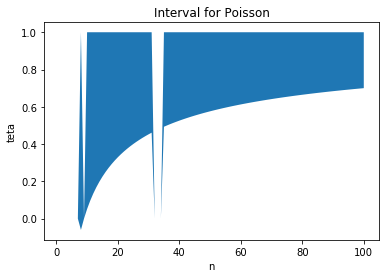

In [59]:
#task_4
rv = sts.poisson(teta)
X = rv.rvs(100)
fr = np.zeros((100))
to = np.zeros((100))
Ufr = rv.ppf((1 + .95) / 2)
Uto = rv.ppf((1 - .95) / 2)
print u'Доверительный интервал для параметра распределения Пуассона'
for i in range(1, 101):
    avgX = np.cumsum(X)[i - 1] / i
    fr[i - 1] = avgX - math.sqrt(avgX * 1. / i) * Ufr
    to[i - 1] = avgX + math.sqrt(avgX * 1. / i) * Uto
plt.fill_between(range(1, 101), fr, to)
plt.title("Interval for Poisson")
plt.xlabel('n')
plt.ylabel('teta')
plt.show()

Доверительный интервал для параметра гамма распределения


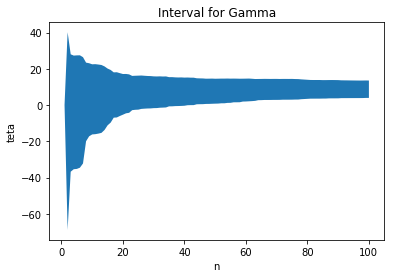

In [66]:
#task_5
teta = 10
lam = 1
rv = sts.gamma(teta, lam)
X = rv.rvs(100)
fr = np.zeros((100))
to = np.zeros((100))
Ufr = rv.ppf((1 + .95) / 2)
Uto = rv.ppf((1 - .95) / 2)
print u'Доверительный интервал для параметра гамма распределения'
for i in range(2, 101):
    avgX = np.cumsum(X)[i - 1] / i
    avgX2 = np.cumsum(X**2)[i - 1] / i
    s2 = avgX2 - avgX**2
    tetaEv = avgX2 * 1. / s2
    fr[i - 1] = avgX * lam - math.sqrt(tetaEv) / math.sqrt(i) * Ufr
    to[i - 1] = avgX * lam + math.sqrt(tetaEv) / math.sqrt(i) * Uto
plt.fill_between(range(1, 101), fr, to)
plt.title("Interval for Gamma")
plt.xlabel('n')
plt.ylabel('teta')
plt.show()